# Bulding Models using the Sequential API 

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= '0.20'

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= '2.0'
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

----
## MNIST Dataset

Loading data from keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


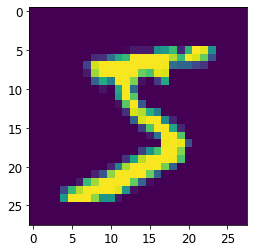

In [6]:
plt.imshow(X_train[0])

In [7]:
print(y_train[0])

5


Building a __simple model__

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [29]:
%%time
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0666 - val_accuracy: 0.9807
Epoch 2/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0673 - val_accuracy: 0.9815
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0819 - val_accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0783 - val_accuracy: 0.9802s - l
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0824 - val_accuracy: 0.9803
Wall time: 14.4 s


In [30]:
h = model.history.history

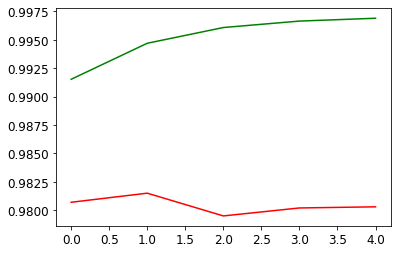

In [31]:
plt.plot(h['accuracy'], 'g')
plt.plot(h['val_accuracy'], 'r')

In [32]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0824 - accuracy: 0.9803


[0.08236684771249202, 0.9803]

__All together__

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 4s 85us/sample - loss: 0.2228 - accuracy: 0.9342 - val_loss: 0.1056 - val_accuracy: 0.9696
Epoch 2/5
51000/51000 [==============================] - 4s 82us/sample - loss: 0.0922 - accuracy: 0.9718 - val_loss: 0.0821 - val_accuracy: 0.9769
Epoch 3/5
51000/51000 [==============================] - 4s 82us/sample - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0726 - val_accuracy: 0.9791
Epoch 4/5
51000/51000 [==============================] - 4s 83us/sample - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0792 - val_accuracy: 0.9764
Epoch 5/5
51000/51000 [==============================] - 4s 82us/sample - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0835 - val_accuracy: 0.9798


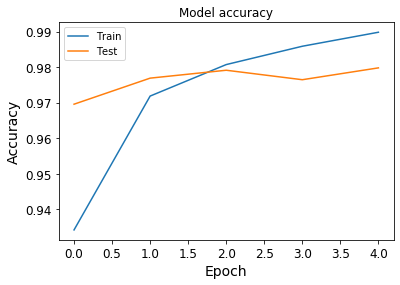

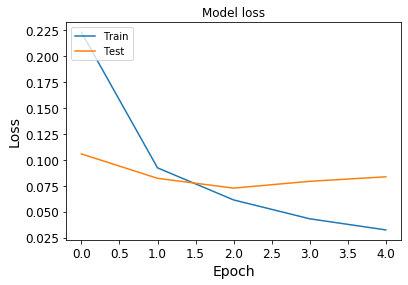

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=keras.activations.relu),
    tf.keras.layers.Dense(10, activation=keras.activations.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_split=0.15,
                    epochs=5,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0766 - accuracy: 0.9784


[0.07658022547048167, 0.9784]

In [20]:
res = model.predict(X_test[0].reshape((1, 28, 28)))

In [21]:
y_test[0]

7

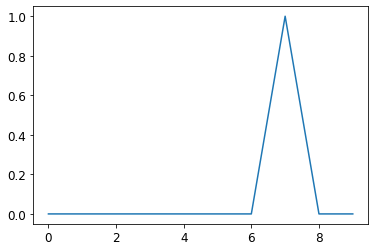

In [22]:
plt.plot(range(10), res[0])

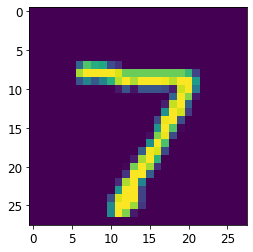

In [24]:
plt.imshow(X_test[0])

----
## FashionMNIST Dataset


In [34]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

4423680/4422102 [==============================] - 0s 0us/step


In [36]:
X_train_full.shape

(60000, 28, 28)

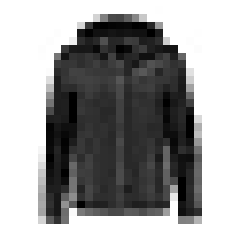

In [37]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [39]:
class_names[y_train[0]]

'Coat'

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4843 - accuracy: 0.8322 - val_loss: 0.4543 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4414 - accuracy: 0.8462 - val_loss: 0.4379 - val_accuracy: 0.8486
Epoch 4/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.4129 - accuracy: 0.8547 - val_loss: 0.4156 - val_accuracy: 0.8564
Epoch 5/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3926 - accuracy: 0.8619 - val_loss: 0.3811 - val_accuracy: 0.8654
Epoch 6/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3771 - accuracy: 0.8668 - val_loss: 0.3727 - val_accuracy: 0.8692
Epoch 7/30
55000/55000 [==============================] -

In [45]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

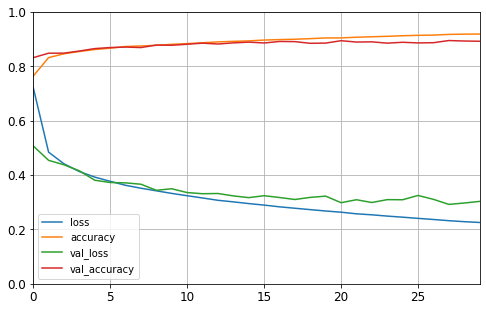

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3358 - accuracy: 0.8782


[0.3358254776954651, 0.8782]

In [48]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

----
## California Housing Dataset (Regression)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 902us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 927us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 990us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 950us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 842us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 891us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 973us/step - loss: 0.4875 - va

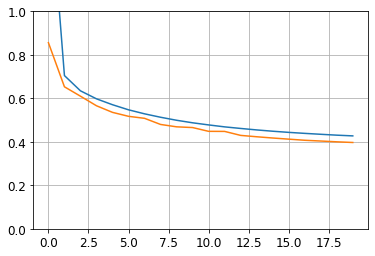

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [7]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

__Saving__ the model

In [8]:
model.save('models/housing_model.h5')
model = keras.models.load_model('models/housing_model.h5')

Using __TensorBoard__ for visualization

In [9]:
root_logdir = os.path.join(os.curdir, 'tf_logs')

In [10]:
def get_run_logdir(model_name):
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, model_name, run_id)

In [11]:
run_logdir = get_run_logdir('housing')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [12]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4240 - val_loss: 0.3932
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4210 - val_loss: 0.3911
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.3880
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4157 - val_loss: 0.3864
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4137 - val_loss: 0.3838
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4114 - val_loss: 0.3819
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4096 - val_loss: 0.3802
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 0.3785
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4061 - val_loss: 0.3765
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4044 - val_loss: 0.3756

In [8]:
#%load_ext tensorboard
#%tensorboard --logdir=./tf_logs --port=6006

__Fine-tuning__ the model

In [13]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [10]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, 
                input_shape=[8], ):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [11]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [16]:
param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(25, 45),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

__Crash__ due to issue <https://github.com/keras-team/keras/issues/13586/>

In [1]:
#rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)
#rnd_search_cv.fit(X_train, y_train, epochs=100, 
#                  validation_data=(X_valid, y_valid),
#                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])